# Анализ успешных продаж игр для планирования рекламы

# Описание проекта

- Проект направлен на анализ данных интернет-магазина Стримчик, специализирующегося на продаже компьютерных игр по всему миру. Имея доступ к историческим данным о продажах игр, оценкам пользователей и экспертов, а также информации о жанрах и платформах (например, Xbox и PlayStation), наша цель — выявить ключевые закономерности, определяющие успешность игры. 

- Эти знания помогут спрогнозировать потенциально популярные продукты и более эффективно планировать рекламные кампании на предстоящий год. Основные данные охватывают период до 2016 года, что позволяет разработать стратегии продвижения на 2017-й год. Важным аспектом исследования является анализ возрастных рейтингов ESRB, которые могут оказывать влияние на продажи игр среди различных возрастных групп.

# Описание данных

* **`Name`** — название игры
* **`Platform`** — платформ
* **`Year_of_Release`** — год выпуска
* **`Genre`** — жанр игры
* **`NA_sales`** - продажи в Северной Америке (миллионы проданных копий)
* **`EU_sales`** - продажи в Европе (миллионы проданных копий)
* **`JP_sales`** — продажи в Японии (миллионы проданных копий)
* **`Other_sales`** — продажи в других странах (миллионы проданных копий)
* **`Critic_Score`** — оценка критиков (максимум 100)
* **`User_Score`** — оценка пользователей (максимум 10)
* **`Rating`** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Ознакомление и подготовка данных 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('C:/Users/Gpets/Data With Python/datasets/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена названия столбцов (приведение к нижнему регистру)

Для начала приведем названия столбцев к нижнему регистру для удобности в прочтении

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Проверка данных на аномальные значения

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Давайте взглянем на наши данные

In [6]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Сделаем некоторые выводы:
* Аномальных значений не наблюдаю
* Большая часть игр выпущена в период с 2003 по 2010 годы.
* Средняя оценка критиков составляет около 71 из 100.

### Проверка на явные и неявные дубликаты

Проверка на явные дубликаты

In [7]:
dupliсates = df.duplicated().sum()
print(f'Количество явных дубликатов: {dupliсates}')

Количество явных дубликатов: 0


Явных дубликатов нет, очень хорошо. Теперь займемся неявными

Приведем все значения в столбцах `name`, `platform` и `genre` в нижний регистр, для коррекции значений, вдруг одни и те же значения записаны по разному

In [8]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

Затем, мы будем отфильтровывать игры с одинаковыми именами и платформами, которые могли быть записаны несколько раз.

In [9]:
implicit_duplicates = df[df.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False)]
print(implicit_duplicates[['name', 'platform', 'year_of_release', 'genre']])

                name platform  year_of_release   genre
604    madden nfl 13      ps3           2012.0  sports
659              NaN      gen           1993.0     NaN
14244            NaN      gen           1993.0     NaN
16230  madden nfl 13      ps3           2012.0  sports


In [10]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'])

Теперь данные очищены от дубликатов, и каждый уникальный набор информации об игре представлен один раз.

In [11]:
print("\nПроверка данных после удаления дубликатов:")
print(df.info())
print("\nДубликаты по тем же параметрам:")
print(df.duplicated(subset=['name', 'platform', 'year_of_release']).sum())


Проверка данных после удаления дубликатов:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None

Дубликаты по тем же параметрам:
0


Все дубликаты были удалены, и количество строк почти не изменилось. Нет явных аномалий по типам данных. Все выглядит замечательно

### Преобразование данных в нужные типы

Теперь посмотрим на столбцы подробнее и вслучае надобности, изменим его под нужный тип

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


* **`name`** - оставим без изменений, так как это текстовая строка названия игры.


* **`platform`** - оставим без изменений, так как это текстовая строка платформы.


* **`year_of_release`** - нужно преобразовать в тип `int`, потому что это год выпуска игры, который должен быть целым числом.


* **`genre`** - оставим без изменений, так как это текстовая строка жанра игры.


* **`na_sales`** - оставим без изменений, это числовые значения продаж в миллионах, поэтому тип `float64` корректен и позволяет точно хранить данные с дробными частями.


* **`eu_sales`** - оставим без изменений, это числовые значения продаж в миллионах, поэтому тип `float64` корректен и позволяет точно хранить данные с дробными частями.


* **`jp_sales`** - оставим без изменений, это числовые значения продаж в миллионах, поэтому тип `float64` корректен и позволяет точно хранить данные с дробными частями.


* **`other_sales`** - оставим без изменений, это числовые значения продаж в миллионах, поэтому тип `float64` корректен и позволяет точно хранить данные с дробными частями.


* **`critic_score`** - оставим без изменений, это  оценки критиков выраженые в числовом формате, часто с десятичными знаками.


* **`user_score`** - нужно преобразовать в тип `float`, потому что этот столбец содержит числовые оценки пользователей, также в столбце есть строковые значения `tbd` что означает `to be determined`, поэтому сначала поменяем значения `tbd` на `NaN` и потом преобразуем в тип `float`


* **`rating`** - оставим без изменений, так как это рейтинги возрастных категорий для игр.

In [13]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Данные выглядят корректно и соответсвуют своему значению, идем дальше

### Обработка пропусков

Проверим наши данные на наличие пропусков и пустых значений

In [15]:
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Пропуски есть в нескольких столбцах, давайте разберемся, в каких столбцах стоит заполнить или удалить пропуски, а где их целесообразнее оставить:


* **`name`** - Пропуски удаляем, так как игра без названия не имеет смысла для анализа.


* **`genre`** - Также как и в случае `name`, без названия жанра не имеет смысла для анализа.


* **`year_of_release`** - Заполним пропуски медианным значением, так как год выпуска имеет числовую природу и медиана — это надежная оценка.


* **`critic_score`**, **`user_score`** - Пропуски оставим, так как в этих столбцах оценки могут отсутствовать из-за отсутствия отзывов.


* **`rating`** - Оставим пропуски, так как игры могли не проходить через рейтинг ESRB, особенно если они были выпущены до получения рейтингов.

In [16]:
df = df.dropna(subset=['name', 'genre', 'year_of_release'])

In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

### Добавление нового столбца `total_sales`

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец **`total_sales`**.

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [19]:
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

In [20]:
df['rating'].fillna('No Rating', inplace=True)
print(df['rating'].value_counts())

No Rating    6676
E            3920
T            2905
M            1536
E10+         1393
EC              8
K-A             3
RP              1
AO              1
Name: rating, dtype: int64


### Вывод по предобработки данных

После тщательной предобработки данных, мы разобрались с дубликатами и очистили датасет от ненужных повторов. Названия столбцов привели к единому формату, а также убедились, что данные корректно преобразованы в нужные типы. Пропуски в важных колонках, таких как названия игр и жанры, были удалены, а для года выпуска мы исключили строки с пропущенными значениями, чтобы не исказить анализ. В некоторых колонках, например, оценках критиков и пользователей, остались пропуски, но это не ошибка — их отсутствие несет в себе информацию, которую будем учитывать в анализе. На основе данных был добавлен новый столбец total_sales, и теперь наш датасет готов для полноценного анализа и поиска ключевых закономерностей.

## Исследовательский анализ данных

Теперь после того как мы обработали наш столбец, займемся подробным анализом.

### Сколько игр выпускалось в разные годы?

Группируем наши данные по годам в переменную **`year_games`**

In [21]:
year_games = df.groupby('year_of_release').size()
year_games

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
dtype: int64

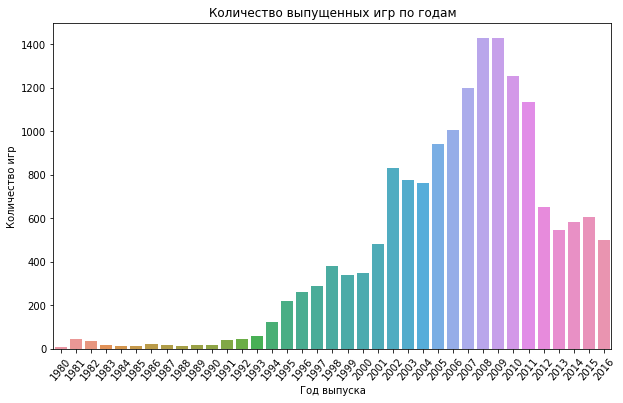

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=year_games.index, y=year_games.values)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation = 50)
plt.show()

На графике видно, что количество выпущенных игр резко увеличилось с середины 90-х годов и достигло пика в 2008-2009 годах, после чего началось постепенное снижение. Это означает, что период с 90-х до конца 2000-х был наиболее продуктивным для игровой индустрии за этот период времени. Данные за более ранние периоды, хотя и важны для общей картины, не столь значительны, так как в те годы выпускалось значительно меньше игр. Особое внимание стоит уделить анализу периода с 90-х годов и далее, где происходили ключевые изменения и рост индустрии.

### Как менялись продажи по платформам?

Посмотрим какие вообще платформы представлены у нас в данных

In [23]:
df['platform'].value_counts(ascending=False)

ps2     2127
ds      2121
ps3     1305
wii     1286
x360    1232
psp     1193
ps      1190
pc       957
gba      811
xb       803
gc       542
3ds      512
psv      429
ps4      392
n64      316
xone     247
snes     239
sat      173
wiiu     147
2600     116
nes       98
gb        97
dc        52
gen       27
ng        12
ws         6
scd        6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64

Теперь посмотрим самые популярные платформы по продажам. Для этого сгруппируем и суммируем продажи по платформам в `platform_sales`

In [24]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(5)

platform
ps2     1233.56
x360     961.24
ps3      931.33
wii      891.18
ds       802.78
Name: total_sales, dtype: float64

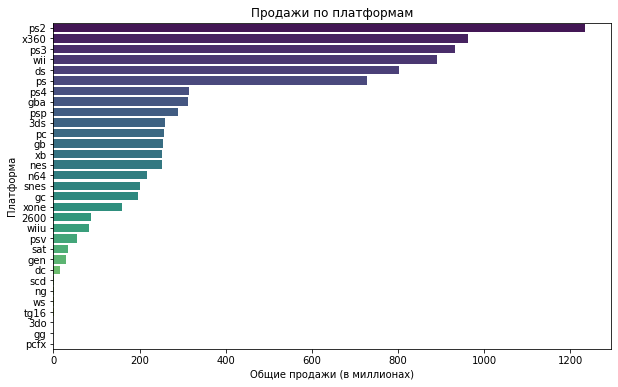

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette="viridis")

plt.title('Продажи по платформам')
plt.xlabel('Общие продажи (в миллионах)')
plt.ylabel('Платформа')
plt.show()

Для меня было очевидно что самыми популярными платформами будут представители:


* **Sony(PS2, PS3)**


* **Nintendo(DS, Wii)**


* **Xbox(X360)**

Сформируем топ-5 платформ в отдельную переменную

In [26]:
top_platforms = platform_sales.head(5).index

Профильтруем наши данные по этим платформам в отделбны фрейм

In [27]:
top_platforms_data = df[df['platform'].isin(top_platforms)]
top_platforms_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,ds,2009,sports,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,0.01
16704,plushees,ds,2008,simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,NaN,NaN,No Rating,0.00
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,0.01


И теперь группируем данные по годам и платформам для построения графика

In [28]:
sales_year_platform = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

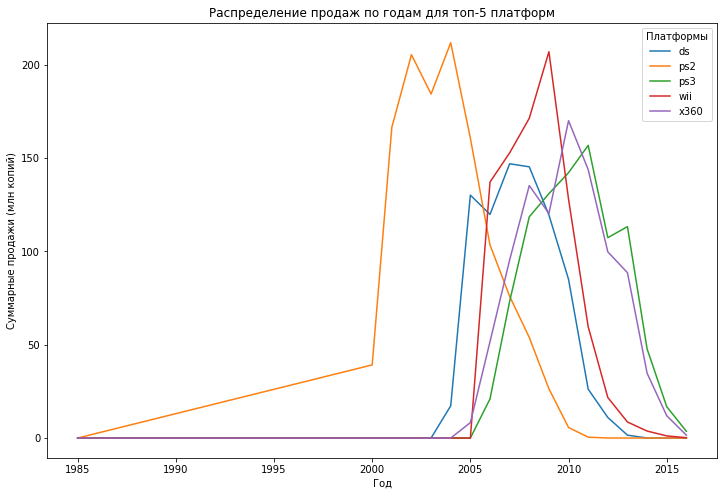

In [29]:
plt.figure(figsize=(12, 8))
sales_year_platform.plot(kind='line', ax=plt.gca())
plt.title('Распределение продаж по годам для топ-5 платформ')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформы')
plt.show()

На графике мы видем, что каждая платформа имеет характерный срок жизни, начиная с момента её появления на рынке, достигая пика продаж и затем постепенно исчезая.

* PS2 и DS: PS2 имело самые продолжительные периоды популярности с пиком продаж в начале 2000-х. DS немного позже. Их популярность длилась около 10-12 лет, после чего продажи резко сократились.


* Wii, PS3, и X360: начали активно продаваться с середины 2000-х годов, достигли своего пика в конце 2000-х и затем начали постепенно снижаться. Продажи этих платформ были активны примерно 7-10 лет.


Таким образом, можно сделать вывод, что жизненный цикл большинства игровых платформ составляет примерно 7-12 лет. В течение этого времени они проходят через фазу быстрого роста, достигают пика и затем постепенно выходят из оборота, уступая место новым платформам.

In [30]:
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
median_life = time_life['life'].median()

print(f'Медианный срок жизни платформ: {median_life} лет')

Медианный срок жизни платформ: 7.0 лет


### Актуальный период

Для прогнозирования лучше выбрать промежуток в 2-5 лет, чтобы захватить актуальные тренды и избежать влияния устаревших данных. Таким образом, можно ограничить анализ данными с 2012 по 2016 год для прогноза на 2017 год, что обеспечит более точные результаты.

Теперь будем работать только с актуальным периодом для прогнозирования на 2017 год.

In [31]:
df_filtered = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]
print(df_filtered['year_of_release'].value_counts())

2012    652
2015    606
2014    581
2013    544
2016    502
Name: year_of_release, dtype: Int64


### Какие платформы лидируют по продажам?

Для начала, давайте выделим сгруппированные данные по всем продажам у платформ в отдельную переменную

In [32]:
df_for_sales = df_filtered.groupby('platform')['total_sales']

Затем выделим топ 5 самых продаваемых платформ также в отдельную переменную и построим график

In [33]:
top_platforms_recent = df_for_sales.sum().nlargest(5)
top_platforms_recent

platform
ps4     314.14
ps3     288.78
x360    236.54
3ds     194.61
xone    159.32
Name: total_sales, dtype: float64

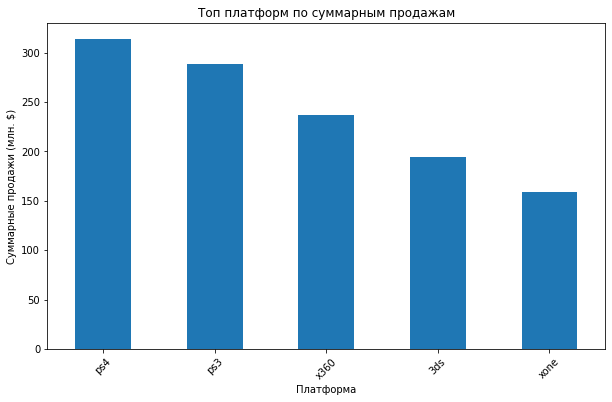

In [34]:
plt.figure(figsize=(10, 6))
top_platforms_recent.plot(kind='bar', x='platform', y='total_sales', legend=False)
plt.title('Топ платформ по суммарным продажам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн. $)')
plt.xticks(rotation=45)
plt.show()

На графике показаны платформы с наибольшими суммарными продажами за актуальный период. Лидером является PS4, с суммарными продажами более 300 миллионов долларов. За ней следует PS3 с чуть меньшими, но все же значительными продажами. Далее идут Xbox 360, 3DS и XOne.

PS4 и PS3 демонстрируют высокую популярность, что свидетельствует о большой доле рынка этих платформ. Хотя PS3 постепенно теряет позиции, PS4, будучи более новой консолью, имеет потенциал для дальнейшего роста. Это делает её важным объектом для будущих стратегий и рекламных кампаний.

### График по глобальным продажам игр в разбивке по платформам

Построим графики «ящик с усами» для каждой платформы, это поможет нам глубже понять распределение глобальных продаж и выявить возможные тенденции на рынке.

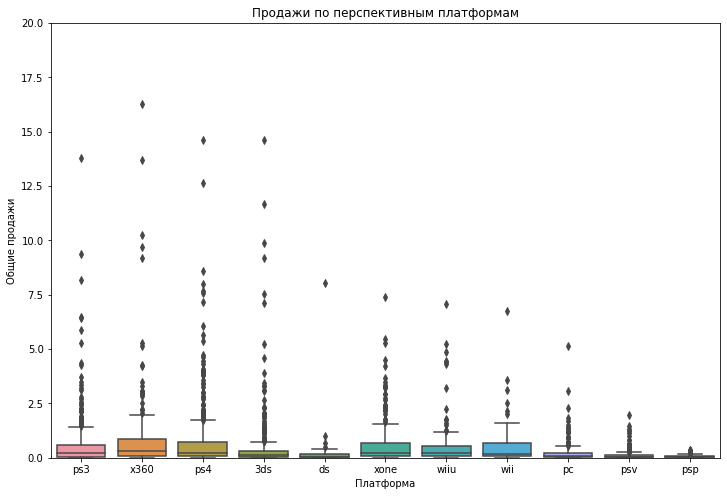

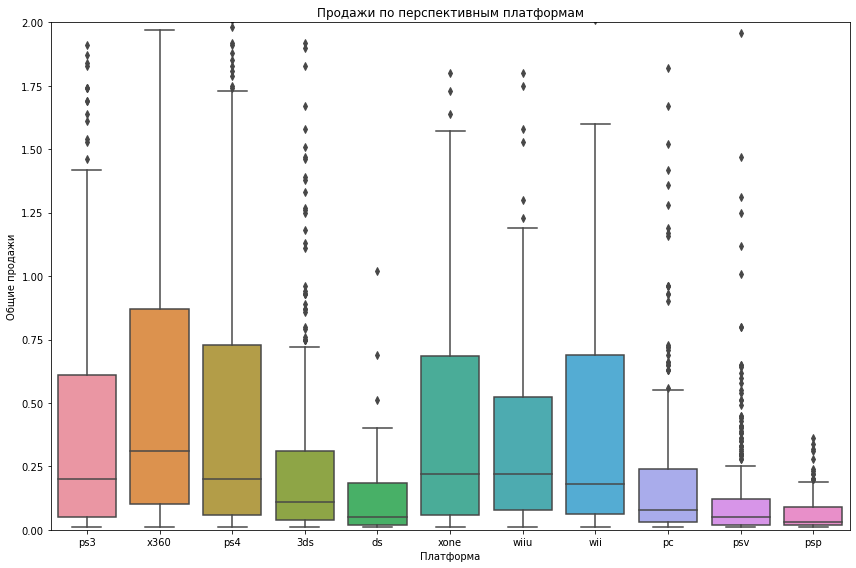

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=df_filtered)
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.ylim(0, 20)  # верхний предел


plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=df_filtered)
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.ylim(0, 2)  # нижней предел

plt.tight_layout()
plt.show()

По графикам видно, что наибольшие продажи по платформам наблюдаются у PS3, X360 и PS4. Эти платформы показывают устойчивый уровень продаж, с множеством игр, которые продаются в диапазоне до 1.5-2 миллионов копий.

Однако, при более детальном рассмотрении с ограничением графика, заметно, что медиана продаж у большинства платформ находится значительно ниже — около 0.25 миллиона копий, что говорит о том, что большинство игр не достигают таких высоких продаж. Это подтверждает, что только несколько хитов вытягивают общие показатели продаж для этих платформ.

Для анализа стоит учитывать не только лидеров продаж, но и общую картину, где много игр имеют сравнительно небольшие продажи.

### Диаграмма рассеяния и корреляция между отзывами пользователей и критиков с продажами для PS4:

Построим диаграммы для того чтобы понять, что влияет на успех игры, на что делать акцент, чтобы игра хорошо продавалась, и какие аспекты можно улучшить.

Для начала выделим в отдельную переменную данные для `PS4`

In [36]:
ps4 = df_filtered[df_filtered['platform'] == 'ps4']

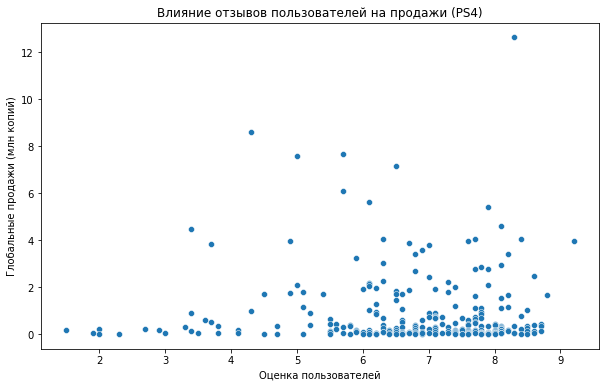

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4, x='user_score', y='total_sales')
plt.title('Влияние отзывов пользователей на продажи (PS4)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')
plt.show()

Влияние отзывов пользователей на продажи:

На графике мы видим взаимосвязь между оценками пользователей и глобальными продажами. Видно, что между этими двумя показателями нет ярко выраженной зависимости. Хотя есть несколько игр с высокими продажами и более высокими пользовательскими оценками, большинство игр с продажами до 2 миллионов копий имеют разброс оценок от 5 до 8.


Отзывы пользователей не оказывают значительного влияния на продажи игр для PS4. Высокие оценки пользователей не гарантируют высокие продажи.

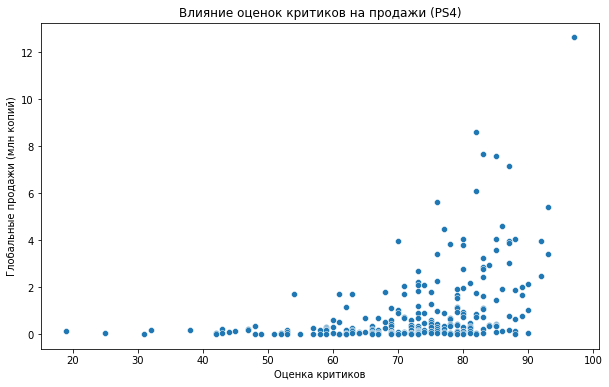

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4, x='critic_score', y='total_sales')
plt.title('Влияние оценок критиков на продажи (PS4)')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')
plt.show()

Влияние оценок критиков на продажи:

Этот график показывает, как оценки критиков влияют на продажи игр для PS4. Здесь мы видим более очевидную зависимость: игры с более высокими оценками критиков (выше 70) имеют тенденцию к более высоким продажам. Есть игры с оценками критиков выше 80, которые достигают продаж выше 4 миллионов копий.


Оценки критиков оказывают большее влияние на продажи игр чем отзывы пользователей. Высокие оценки критиков могут способствовать увеличению продаж игр на платформе PS4.

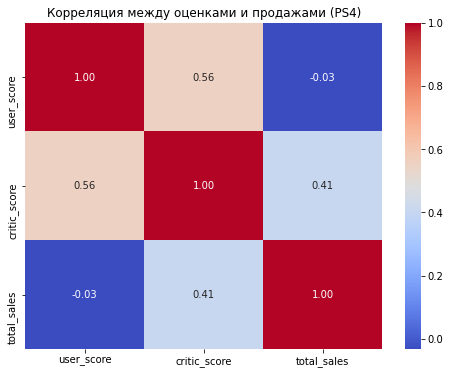

In [39]:
# Корреляционная матрица для PS4 данных
correlation_matrix = ps4[['user_score', 'critic_score', 'total_sales']].astype(float).corr()

# Визуализация корреляционной матрицы с помощью тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между оценками и продажами (PS4)')
plt.show()

Корреляция между оценками и продажами:
На тепловой карте корреляций можно увидеть численные значения корреляции между различными показателями:


* Корреляция между оценками пользователей и критиков составляет 0.56, что говорит о том, что критики и пользователи, в целом, оценивают игры схожим образом.


* Корреляция между оценками критиков и продажами составляет 0.41, что указывает на положительную взаимосвязь.


* Корреляция между оценками пользователей и продажами практически отсутствует (-0.03), что подтверждает, что оценки пользователей не являются значимым фактором для продаж.

На продажи игр на платформе PS4 больше всего влияют оценки критиков. Они оказывают умеренное положительное влияние на продажи. Оценки пользователей, напротив, практически не влияют на уровень продаж, что указывает на то, что другие факторы, такие как маркетинг, бренд или популярность франшизы, могут играть более значительную роль в успехе игры.

### Соотнесем выводы с продажами игр на других платформах.

In [40]:
platforms_to_analyze = ['ps3', 'x360', '3ds']
correlations = {'platform': [], 'critic_sales_corr': [], 'user_sales_corr': []}

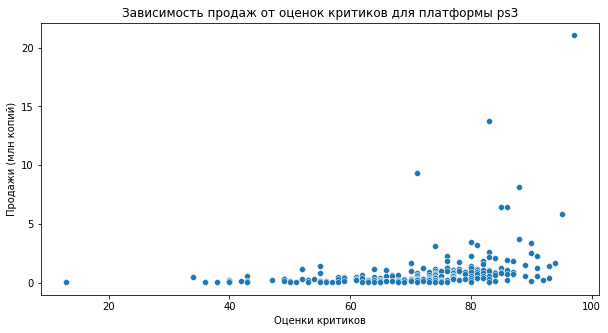

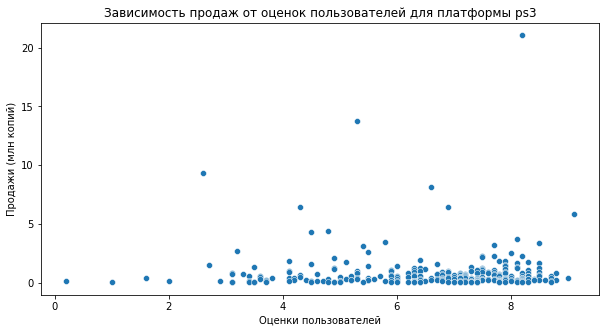

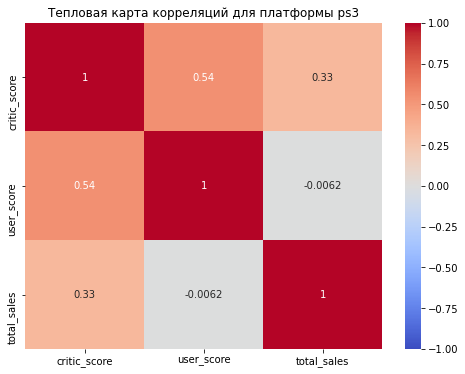

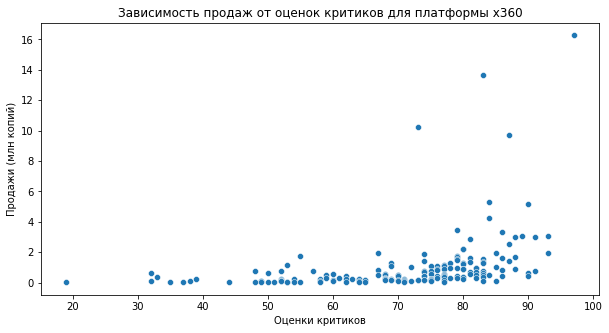

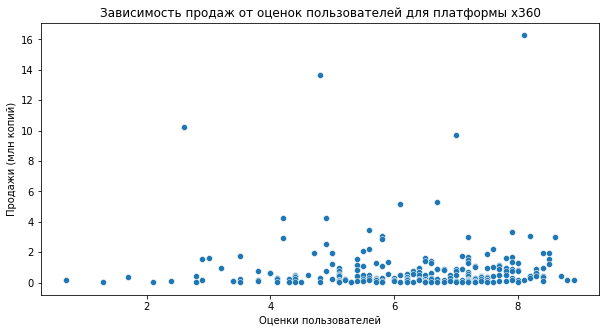

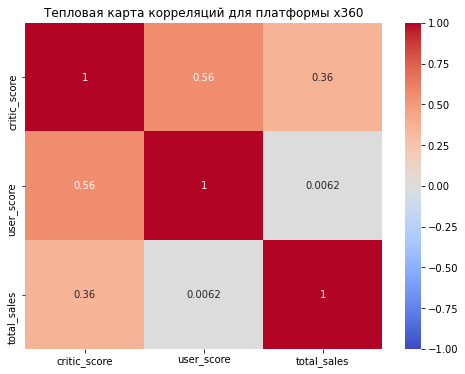

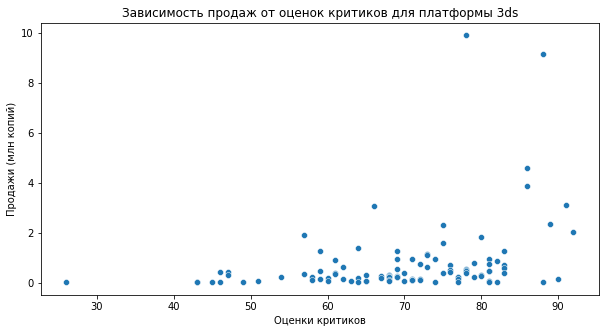

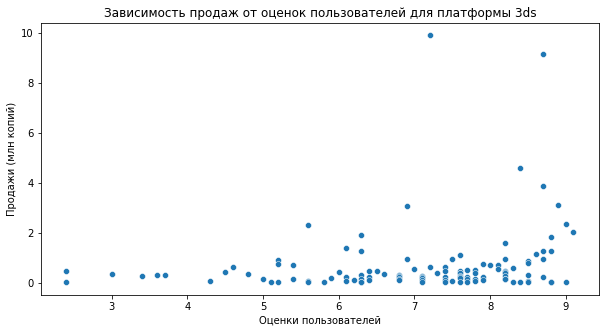

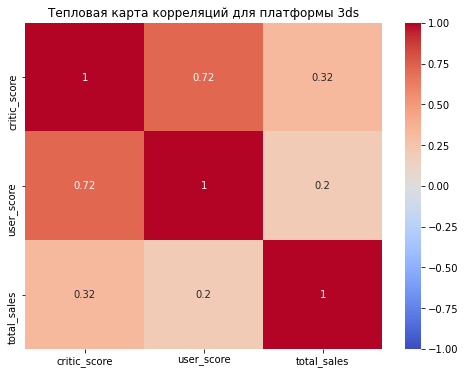

  platform  critic_sales_corr  user_sales_corr
0      ps3           0.334152        -0.006206
1     x360           0.360573         0.006164
2      3ds           0.320803         0.197583


In [41]:
for platform in platforms_to_analyze:
    platform_data = df_filtered[df_filtered['platform'] == platform]
    
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data)
    plt.title(f'Зависимость продаж от оценок критиков для платформы {platform}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи (млн копий)')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
    plt.title(f'Зависимость продаж от оценок пользователей для платформы {platform}')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи (млн копий)')
    plt.show()

    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    user_corr = platform_data['user_score'].corr(platform_data['total_sales'])

    correlations['platform'].append(platform)
    correlations['critic_sales_corr'].append(critic_corr)
    correlations['user_sales_corr'].append(user_corr)

    plt.figure(figsize=(8, 6))
    heatmap_data = platform_data[['critic_score', 'user_score', 'total_sales']].corr()
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Тепловая карта корреляций для платформы {platform}')
    plt.show()

correlation_df = pd.DataFrame(correlations)
print(correlation_df)


По результатам диаграмм и карт можно сделать такой вывод:

* `PS3`: Оценки критиков имеют умеренную положительную корреляцию с продажами (0.33), что говорит о том, что хорошие отзывы критиков способствуют увеличению продаж. Оценки пользователей, однако, практически не оказывают влияния на продажи (-0.006), что указывает на их слабую связь.


* `Xbox 360`: Аналогично, отзывы критиков оказывают более заметное влияние на продажи (0.36). В то же время, корреляция с оценками пользователей минимальна (0.006), что говорит о незначительном воздействии пользовательских оценок на успех игр на этой платформе.


* `Nintendo 3DS`: Здесь ситуация схожа — влияние оценок критиков на продажи умеренное (0.32), однако оценки пользователей оказывают большее влияние по сравнению с другими платформами (0.20), что может свидетельствовать о более внимательном отношении пользователей Nintendo к мнению других игроков.


Таким образом, для всех платформ можно заметить, что влияние оценок критиков на продажи выше, чем оценок пользователей.

### Самые прибыльные жанры

Сгруппируем данные по жанрам и посчитаае м суммарные продажи для каждого жанра.

In [42]:
genre_sales = df_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_median_sales = df_filtered.groupby('genre')['total_sales'].median().sort_values(ascending=False)
print("Суммарные продажи по жанрам:\n", genre_sales)
print("\nМедианные продажи по жанрам:\n", genre_median_sales)

Суммарные продажи по жанрам:
 genre
action          441.12
shooter         304.73
role-playing    192.80
sports          181.06
misc             85.04
platform         61.00
racing           53.50
fighting         44.49
simulation       35.12
adventure        29.43
strategy         13.34
puzzle            4.89
Name: total_sales, dtype: float64

Медианные продажи по жанрам:
 genre
shooter         0.440
sports          0.240
platform        0.210
role-playing    0.140
racing          0.140
fighting        0.130
action          0.120
misc            0.120
simulation      0.120
strategy        0.080
puzzle          0.045
adventure       0.030
Name: total_sales, dtype: float64


Выделим топ жанров в отдельную переменную, построим график и диаграмму размаха

In [43]:
top_genre = genre_sales.head(5)
top_median_genre = genre_median_sales.head(5)

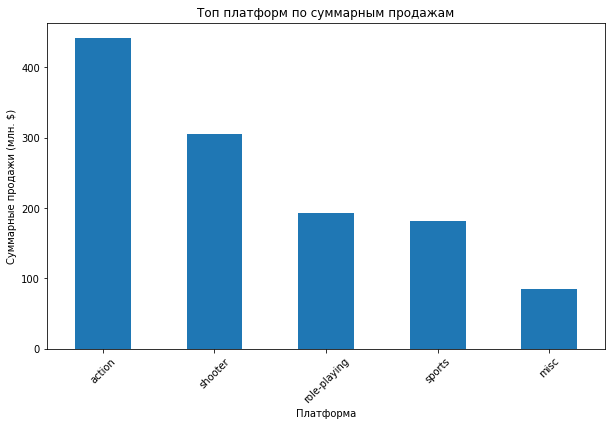

In [44]:
plt.figure(figsize=(10, 6))
top_genre.plot(kind='bar', x='platform', y='total_sales', legend=False)
plt.title('Топ платформ по суммарным продажам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн. $)')
plt.xticks(rotation=45)
plt.show()

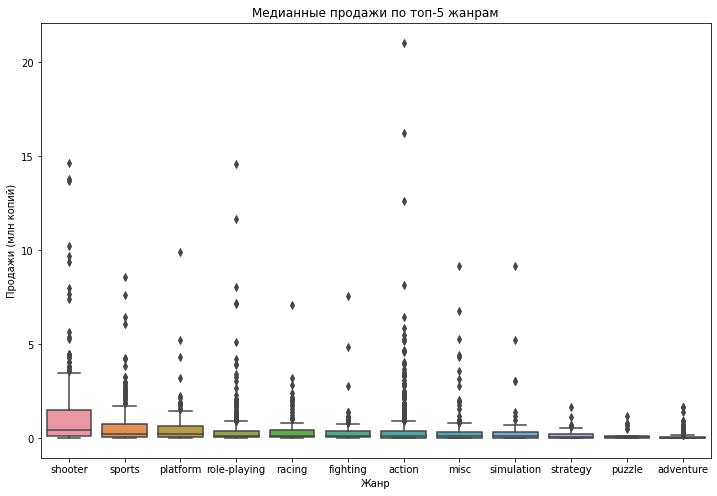

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=df_filtered, order=genre_median_sales.index)
plt.title('Медианные продажи по топ-5 жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.show()

Судя по графику, Action — самый прибыльный жанр игр с большими суммарными продажами. Следом идут Shooter и Sports, которые также демонстрируют высокие показатели продаж, но уступают жанру Action. Жанры Role-Playing и Miscellaneous (Misc) имеют несколько более низкие продажи, но все еще остаются значительными.

По медианным продажам можно сделать вывод, что жанры с самыми высокими медианными показателями продаж не всегда совпадают с жанрами с наибольшими суммарными продажами.

* Shooter — медианные продажи составляют 0.44 млн копий, что делает этот жанр наиболее стабильным и прибыльным в среднем.


* Sports — медианные продажи на уровне 0.24 млн копий показывают, что этот жанр также пользуется устойчивым спросом среди игроков.


* Platform — с медианными продажами 0.21 млн копий, жанр платформеров демонстрирует стабильные продажи.


* Role-Playing — медианные продажи на уровне 0.14 млн копий показывают, что жанр ролевых игр также достаточно стабилен.


* Racing — медианные продажи на уровне 0.14 млн копий подтверждают устойчивый спрос на гоночные игры.


Жанры Shooter и Sports явно выделяются не только по суммарным продажам, но и по стабильности продаж на разных платформах, что делает их одними из самых надежных и прибыльных направлений для разработчиков.

## Составив портрет пользователя для каждого региона (NA, EU, JP)

### Cамые популярные платформы и жанры для каждого региона

Сгруппируем данные по регионам и платформам, затем построим графики

In [46]:
def plot_genre(region_sales, region_name):
    # Получаем суммарные продажи по жанрам
    total_sales = region_sales.sum()
    
    # Выделяем топ-5 жанров
    top_genres = region_sales.head(5)
    
    # Считаем продажи всех остальных жанров
    others_sales = total_sales - top_genres.sum()
    
    # Добавляем категорию "Другие" в данные
    top_genres['Другие'] = others_sales
    
    # Строим круговую диаграмму
    top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(7, 7))
    plt.title(f'Распределение жанров по продажам в регионе {region_name}')
    plt.ylabel('')  # Убираем ось Y
    plt.show()

In [47]:
def plot_platform(region_sales, region_name):
    # Получаем суммарные продажи по платформам
    total_sales = region_sales.sum()
    
    # Выделяем топ-5 платформ
    top_platforms = region_sales.head(5)
    
    # Считаем продажи всех остальных платформ
    others_sales = total_sales - top_platforms.sum()
    
    # Добавляем категорию "Другие" в данные
    top_platforms['Другие'] = others_sales
    
    # Строим круговую диаграмму
    top_platforms.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(7, 7))
    plt.title(f'Распределение платформ по продажам в регионе {region_name}')
    plt.ylabel('')  # Убираем ось Y
    plt.show()

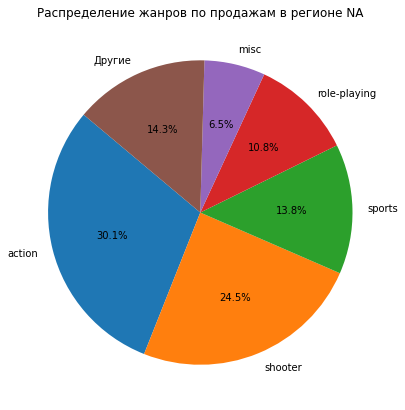

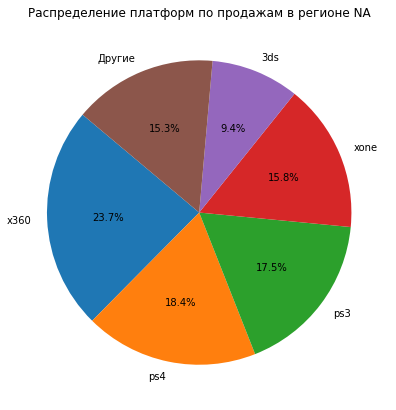

In [48]:
top_genres_na = df_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_platforms_na = df_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
plot_genre(top_genres_na, 'NA')
plot_platform(top_platforms_na, 'NA')

Наиболее популярные платформы для `NA` являются: `X360`, `PS4`, `PS3`, `Xone`, `3ds`. Доля продаж этих платформ достаточно велика, что свидетельствует о сильной культуре консольных игр в Северной Америке.

Наиболее популярными жанрами игр для `NA` являются : `Action`, `Shooter`, `Sports`, `Role-playing`, `Racing`

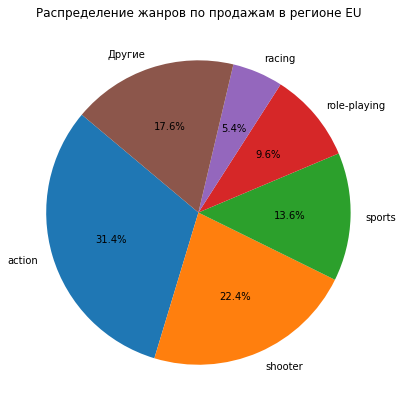

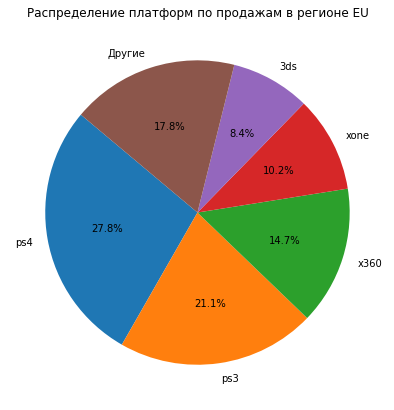

In [49]:
top_genres_eu = df_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_platforms_eu = df_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
plot_genre(top_genres_eu, 'EU')
plot_platform(top_platforms_eu, 'EU')

В Европе популярные платформы схожи с Северной Америкой, однако `PS4` и `PS3` занимают более высокие позиции, что может свидетельствовать о более высоком предпочтении к PlayStation в Европе.

По жанрам данные тоже очень схожи, также лидирует жанр `Action`, `Shoter`, `Sports`.

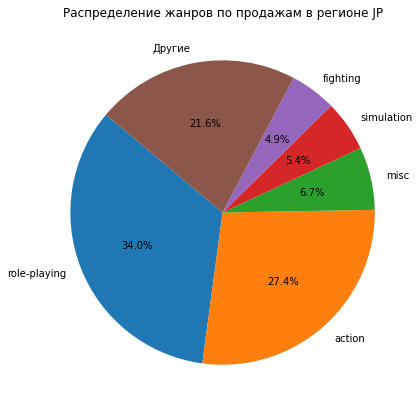

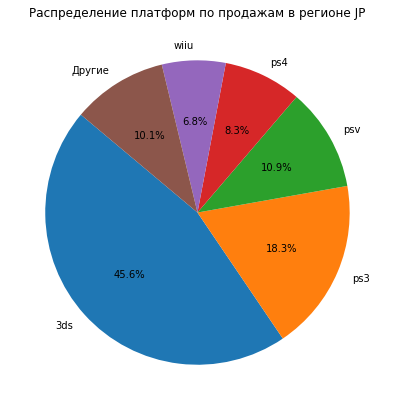

In [50]:
top_genres_jp = df_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top_platforms_jp = df_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
plot_genre(top_genres_jp, 'JP')
plot_platform(top_platforms_jp, 'JP')


Япония имеет заметно другие предпочтения, где лидируют `3DS`, `PS3`, `PS4`, `PSV`, `Wii`. Здесь портативные платформы, такие как 3DS и PSV, занимают гораздо более значительную долю продаж, что указывает на популярность портативного гейминга в этом регионе.

В регионе преобладает жанр `Role-playing` и `Action`. Оба этих жанра занимают больше 50% рынка. Это говорит о том что на рынке Японии стоит сфокусироваться на этих жанрах.

### Влияние рейтинга ESRB на продажи в регионах

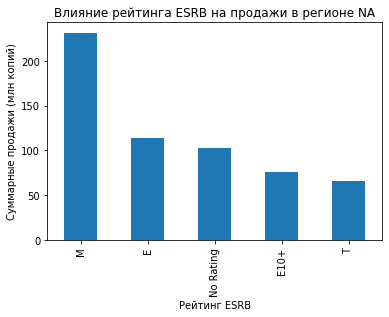

In [51]:
esrb_effect_na = df_filtered.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_effect_na.plot(kind='bar', title='Влияние рейтинга ESRB на продажи в регионе NA')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

`Северная Америка (NA)` Рейтинг `ESRB` сильно влияет на продажи. Игры с рейтингом "M" (молодежный) показывают наибольшие продажи, что свидетельствует о высокой популярности игр с таким рейтингом в этом регионе. Рейтинг "E" (для всех) и "No Rating" также влияют на продажи, но не так значительно, как "M". Рейтинги "E10+" (10 лет и старше) и "T" (подростковый) имеют заметно меньший вклад в продажи.

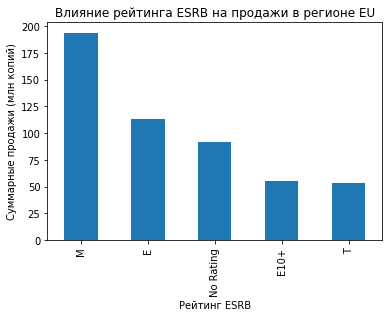

In [52]:
esrb_effect_eu = df_filtered.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_effect_eu.plot(kind='bar', title='Влияние рейтинга ESRB на продажи в регионе EU')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

`Европа (EU)` Рейтинг `ESRB` также оказывает заметное влияние на продажи. Как и в Северной Америке, игры с рейтингом "M" занимают первое место по продажам. Рейтинг "E" также приносит хорошие продажи, в то время как "No Rating" и "E10+" показывают средние результаты. Рейтинг "T" имеет наименьшее влияние на продажи среди всех категорий.

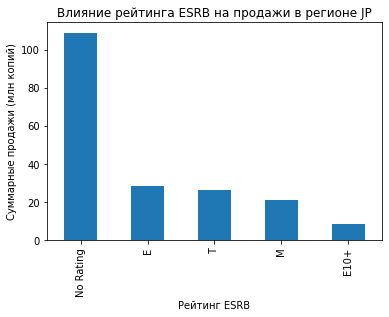

In [53]:
esrb_effect_jp = df_filtered.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
esrb_effect_jp.plot(kind='bar', title='Влияние рейтинга ESRB на продажи в регионе JP')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

`Япония (JP)` Здесь влияние рейтинга `ESRB` на продажи значительно отличается от других регионов. Рейтинг "No Rating" доминирует, что может быть связано с тем, что `ESRB` не так широко используется в Японии. Рейтинг "E" и "T" также оказывают влияние на продажи, но значительно меньше, чем в Северной Америке и Европе. Рейтинг "M" и "E10+" имеют минимальное влияние на продажи в этом регионе.

In [54]:
temp = df_filtered.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

0 0.0


No Rating    1275
M             498
T             412
E             394
E10+          306
Name: rating, dtype: int64

### Общий вывод по портрету пользователя

Портрет пользователя в каждом регионе показывает, что предпочтения заметно различаются в зависимости от культурных особенностей:


* **Северная Америка (NA):** Здесь пользователи отдают предпочтение крупным игровым консолям, таким как Xbox и PlayStation, а также жанрам, таким как экшн и спортивные игры. Рейтинг ESRB имеет значительное влияние на продажи игр, так как рынок регламентирован, и пользователи ориентируются на рекомендации по возрастным ограничениям.


* **Европа (EU):** Похожая картина с Северной Америкой — также доминируют консоли, особенно PlayStation. Европейские игроки предпочитают экшн и спортивные жанры. Рейтинг ESRB влияет на продажи, но не так строго, как в Северной Америке, однако остаётся важным фактором.


* **Япония (JP):** В Японии большее значение имеют портативные устройства, такие как Nintendo DS и PlayStation Portable. Японские пользователи особенно любят ролевые игры (RPG). Рейтинг ESRB не играет столь заметной роли, и культурные предпочтения влияют на выбор игр больше, чем возрастные ограничения.


Таким образом, популярность платформ и жанров напрямую зависит от культурных особенностей региона, а рейтинг ESRB оказывает большее влияние в западных странах, чем в Японии.

## Проверка некоторых гипотез  

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выберем две независимые выборки, чтобы проверить, одинаковы ли средние оценки пользователей для двух платформ — Xbox One и PC. Нулевая гипотеза утверждает, что никакой разницы нет, то есть средние оценки на обеих платформах равны. Альтернативная гипотеза, наоборот, предполагает, что средние оценки пользователей различаются.

В вашем случае, вы сравниваете средние пользовательские рейтинги на двух различных платформах (Xbox One и PC). Эти две группы независимы друг от друга, поскольку рейтинги пользователей на одной платформе не зависят от рейтингов на другой платформе.

`H0`(Нулевая гипотеза): Средние пользовательские рейтинги на платформах Xbox One и PC равны.


`H1`(Альтернативная гипотеза): Средние пользовательские рейтинги на платформах Xbox One и PC не равны.

Фильтруем данные для платформ Xbox One и PC

In [55]:
a = 0.05
xbox_one_ratings = df_filtered[df_filtered['platform'] == 'xone']['user_score'].dropna().astype(float)
pc_ratings = df_filtered[df_filtered['platform'] == 'pc']['user_score'].dropna().astype(float)
print('среднее выборки пользователей Xbox:', xbox_one_ratings.mean())
print('среднее выборки пользователей PC:', pc_ratings.mean())

среднее выборки пользователей Xbox: 6.521428571428572
среднее выборки пользователей PC: 6.4286407766990274


In [56]:
results = st.ttest_ind(xbox_one_ratings, pc_ratings, alternative='two-sided')
print('среднее выборки пользователей Xbox:', xbox_one_ratings.mean())
print('среднее выборки пользователей PC:', pc_ratings.mean())
print('p-value:', results.pvalue)
if results.pvalue < a:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')

среднее выборки пользователей Xbox: 6.521428571428572
среднее выборки пользователей PC: 6.4286407766990274
p-value: 0.5535080500643661
Не получилось отвергнуть нулевую гипотизу


Средние пользовательские рейтинги на Xbox One и PC немного различаются: среднее значение для Xbox One составляет 6.52, а для PC — 6.43. Однако, p-значение равно 0.55, что значительно больше стандартного уровня значимости 0.05. Это означает, что у нас нет достаточных оснований для отвергнуть нулевую гипотезу и утверждать, что разница между рейтингами статистически значима. Таким образом, на основе этих данных можно заключить, что средние оценки пользователей для обеих платформ не имеют статистически значимых различий.

### Средние пользовательские рейтинги жанров Action и Sports

Мы будем использовать двухвыборочный t-тест для независимых выборок. Этот метод подходит потому что мы сравниваем средние рейтинги двух различных жанров игр (Action и Sports). Эти жанры независимы друг от друга.

`H0`(Нулевая гипотеза):  Средний пользовательский рейтинг для жанра Action равен среднему пользовательскому рейтингу для жанра Sports.


`H1`(Альтернативная гипотеза): Средний пользовательский рейтинг для жанра Action не равен среднему пользовательскому рейтингу для жанра Sports.

In [57]:
a = 0.05
action_ratings = df_filtered[df_filtered['genre'] == 'action']['user_score'].dropna().astype(float)
sports_ratings = df_filtered[df_filtered['genre'] == 'sports']['user_score'].dropna().astype(float)
print('среднее выборки рейтинга пользователей жанров Action:', action_ratings.mean())
print('среднее выборки рейтинга пользователей жанров Sports:', sports_ratings.mean())

среднее выборки рейтинга пользователей жанров Action: 6.825047801147227
среднее выборки рейтинга пользователей жанров Sports: 5.455670103092784


In [58]:
results_2 = st.ttest_ind(action_ratings, sports_ratings, alternative='two-sided')
print('среднее выборки рейтинга пользователей жанров Action:', action_ratings.mean())
print('среднее выборки рейтинга пользователей жанров Sports:', sports_ratings.mean())
print('p-value:', results_2.pvalue)
if results_2.pvalue < a:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')

среднее выборки рейтинга пользователей жанров Action: 6.825047801147227
среднее выборки рейтинга пользователей жанров Sports: 5.455670103092784
p-value: 4.8045233804629176e-26
Отвергаем нулевую гипотизу


Средние пользовательские рейтинги для жанров Action и Sports значительно различаются. Средний рейтинг для жанра Action (6.83) значительно выше, чем для жанра Sports (5.46). P-значение - 4.8045233804629176e-26 значительно меньше стандартного уровня значимости 0.05, что позволяет отвергнуть нулевую гипотезу.

Таким образом, есть достаточные основания утверждать, что средние пользовательские рейтинги жанров Action и Sports статистически различаются. Средний рейтинг пользователей для жанра Action существенно выше, чем для жанра Sports.

## Вывод по проекту

В этом проекте мы работали с историческими данными об играх, которые включали информацию о продажах, оценках пользователей и критиков, платформах, жанрах и возрастных рейтингах. Основной целью было выявить закономерности, определяющие успешность игр, чтобы на основе этих данных можно было сделать прогноз на 2017 год и спланировать рекламные кампании.

1. **`Ознакомление и подготовка данных`** 

    * Вначале мы загрузили данные и провели их первичный анализ, чтобы понять, с какими характеристиками и типами данных мы будем работать. 
    
    * Затем привели все столбцы к нижнему регистру для унификации и удобства работы с данными.
      
    * Преобразовали типы данных в некоторых столбцах, чтобы корректно анализировать и обрабатывать информацию.
    
    * Обработали пропуски в данных. Например, 'tbd' в столбце с оценками пользователей заменили на NaN, поскольку эти значения не предоставляли полезной информации. 
        
    * Вычислили и добавили новый столбец, который содержал суммарные продажи игры по всем регионам.


2. **`Исследовательский анализ данных`** 
    * Выпуск игр по годам. Изучили, сколько игр выпускалось в разные годы. Мы обнаружили, что данные за ранние годы неполные и сосредоточились на анализе игр, выпущенных после 2008 года.
    
    * Продажи по платформам: Проанализировали, как менялись продажи игр на разных платформах. Мы определили, что платформы с наибольшими суммарными продажами (PS2, PS3, Wii, DS, X360) были самыми прибыльными. Проанализировали, за какой срок появляются и исчезают платформы, чтобы понять жизненный цикл платформ.
    
    * Актуальный период: На основе анализа предыдущих шагов определили актуальный период, начиная с 2008 года, и сосредоточились на данных за этот период.
    
    * Лидеры по продажам: Определили, какие платформы лидируют по продажам и как меняются их продажи. Оценили перспективы прибыльности для некоторых платформ.
    
    * Корреляция с отзывами: Изучили, как отзывы пользователей и критиков влияют на продажи игр. Построили диаграммы рассеяния и вычислили корреляцию между оценками и продажами. Выводы показали, что оценки критиков имеют значительную корреляцию с продажами, в то время как отзывы пользователей менее значимы.
    
    * Распределение по жанрам: Проанализировали, какие жанры являются наиболее прибыльными. Обнаружили, что жанры с высокими продажами (Action, Sports, Shooter) значительно выделяются на фоне других.
    
    
3. **`Портрет пользователя каждого региона`**
    * Мы выделили топ-5 платформ и жанров для разных регионов (NA, EU, JP) и проанализировали различия в предпочтениях пользователей. Также оценили влияние рейтингов ESRB на продажи в каждом регионе.
    
4. **`Проверка гипотез`**

    * Проверили гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox One и PC. Результаты показали, что нет значимых различий в этих рейтингах.
    
    * Проверили гипотезу о различии средних пользовательских рейтингов для жанров Action и Sports. Гипотеза была подтверждена, и оказалось, что жанр Action имеет значительно более высокий средний рейтинг.
    
    
5. **`Заключение`**

В этом проекте мы проанализировали исторические данные об играх, чтобы выявить ключевые факторы успеха и определить, как наилучшим образом распределить рекламный бюджет на 2017 год. Важно сосредоточиться на следующих аспектах:


* **Платформы для рекламы:** `PlayStation 4` и `Xbox One` эти платформы показали наибольшие суммарные продажи и являются лидерами на рынке. Рекламный бюджет стоит направить в первую очередь на игры для этих платформ, так как они обеспечивают значительную аудиторию и потенциальные продажи. Нужно сосредоточить рекламные усилия на `PlayStation 4` и `Xbox One`.


* **Жанры для рекламы:** `Action` и `Shooter` эти жанры продемонстрировали наивысшие продажи и популярность среди пользователей. Реклама игр в этих жанрах может привести к лучшим результатам и более высокому возврату на рекламные инвестиции. Нужно уделить особое внимание жанрам `Action` и `Shooter`.


* **Возрастной рейтинг ESRB:** в `Северной Америке` и `Европе` Игры с рейтингом "M" (молодежный) показывают наибольшие продажи, что может указывать на интерес аудитории к играм с этим рейтингом. В `Японии` Рейтинг "No Rating" доминирует, что может потребовать дополнительного анализа, чтобы определить, как лучше учитывать отсутствие рейтинга в рекламной стратегии. Нужно нацелиться на игры с рейтингом "M" в `Северной Америке` и `Европе` и учитывать специфику рейтингов в других регионах.



* **Отзывы и рейтинги:** Оценки критиков имеют значительное влияние на продажи, поэтому важно акцентировать внимание на качественных играх с высокими оценками критиков. Отзывы пользователей также важны, но их влияние на продажи меньше. Реклама игр с хорошими отзывами критиков может быть более эффективной. Нужно инвестировать в рекламу игр с высокими оценками критиков, чтобы максимизировать влияние рекламных кампаний.



Эти выводы помогут интернет-магазину «Стримчик» выбрать игры с наибольшим потенциалом успеха и спланировать эффективные маркетинговые стратегии на 2017 год.